# Análise de ativos usando Python e análise de dados

Olá, sou Helvio Siqueira, estudante de Ciencia de Dados. Nos ultimos meses me interessei em investimentos pela bolsa, e para metodo de treino comprei algumas ações e fundos imobiliarios usando análise fundamentalista(ou tentando), e decidi agora usar o Python para uma análise de retornos. Fiz a compra desses ativos em momentos que achei propicio para obter algum lucro, mas como todo bom analista sabe, o mercado é extremamente volatil podendo não corresponder às nossa expectativas :)

Faço aqui uma análise de ativos usando Python e algumas bibliotecas para análise de dados (Pandas, numpy, matplotlib, seaborn), deixo claro que a análise desses ativos não compõe nenhuma especie de recomendação. Desde já digo que aceito criticas e sugestões à respeito do código ;)

Nesse inicio de codigo importo todas as bibliotecas que serão necessarias para fazer a análise(Pandas, Numpy) e plotar graficos(Matplotlib, Seaborn), a biblioteca pandas_datareader é responsavel por extrair os dados da API do Yahoo Finance(ainda ativa em 17/03/2021), API gratuita para a extração de dados do mercado financeiro.

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style= 'whitegrid')

Os ativos que vou fazer a análise seram: ITUB3(Itaú), TAEE3(Taesa), MXRF11(Fundo Maxi Renda), RECT11(Fundo UBS (BR) OFFICE), onde obtenho o fechamento do dia ajustado(com rendimentos, e JCP) desde 2015

In [2]:
ativos = ['ITUB3.SA', 'TAEE3.SA', 'MXRF11.SA', 'RECT11.SA']

dados = pd.DataFrame()

for a in ativos:
    dados[a] = web.DataReader(a, 'yahoo', '2015')['Adj Close']

In [3]:
dados.reset_index(inplace= True)

In [4]:
dados

,Date,ITUB3.SA,TAEE3.SA,MXRF11.SA,RECT11.SA
0,2015-01-02,12.322999,6.219817,7.886515,NaN
1,2015-01-05,12.183867,6.219817,7.782810,NaN
2,2015-01-06,12.303122,6.219817,7.753180,NaN
3,2015-01-07,12.581381,6.219817,7.754168,NaN
4,2015-01-08,12.760263,6.219817,7.756143,NaN
...,...,...,...,...,...
1536,2021-03-17,24.980000,11.620000,10.330000,86.699997
1537,2021-03-18,25.070000,11.570000,10.290000,86.040001
1538,2021-03-19,25.090000,11.730000,10.330000,85.959999
1539,2021-03-22,25.209999,11.840000,10.310000,85.790001


Aqui colho uma amostra de 10% dos dados sem reposição e reorganizo-os pela data para criar um grafico de linha mais resumido e bonito de se olhar.

In [5]:
resumo_itub= dados[['ITUB3.SA', 'Date']].sample(frac= 0.1, replace= False).sort_values(by= 'Date')
resumo_taesa= dados[['TAEE3.SA', 'Date']].sample(frac= 0.1, replace= False).sort_values(by= 'Date')
resumo_mxrf= dados[['MXRF11.SA', 'Date']].sample(frac= 0.1, replace= False).sort_values(by= 'Date')
resumo_rect= dados[['RECT11.SA', 'Date']].sample(frac= 0.1, replace= False).sort_values(by= 'Date')

In [6]:
resumo_itub.set_index('Date', inplace= True)
resumo_taesa.set_index('Date', inplace= True)
resumo_mxrf.set_index('Date', inplace= True)
resumo_rect.set_index('Date', inplace= True)

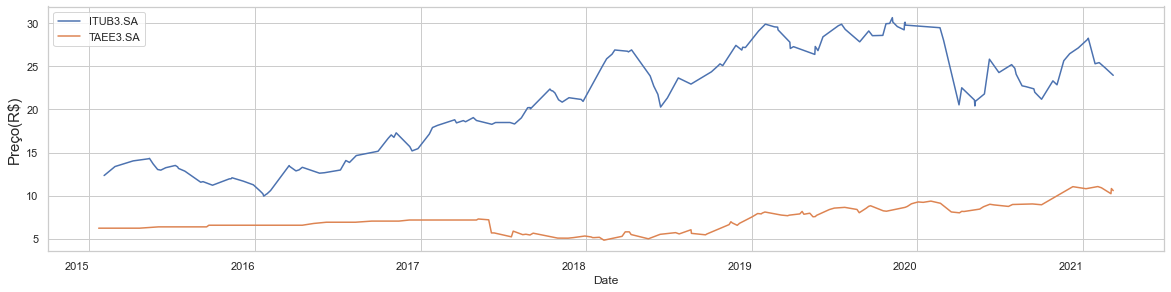

In [7]:
fig= plt.figure(figsize= (20, 5))

ax= fig.add_subplot(1, 1, 1)

resumo_itub.plot(ax= ax)

ax.set_ylabel('Preço(R$)', fontdict = {'fontsize':15})

resumo_taesa.plot(ax= ax)

ax.tick_params(axis= 'x', labelrotation= 0)

<AxesSubplot:xlabel='Date'>

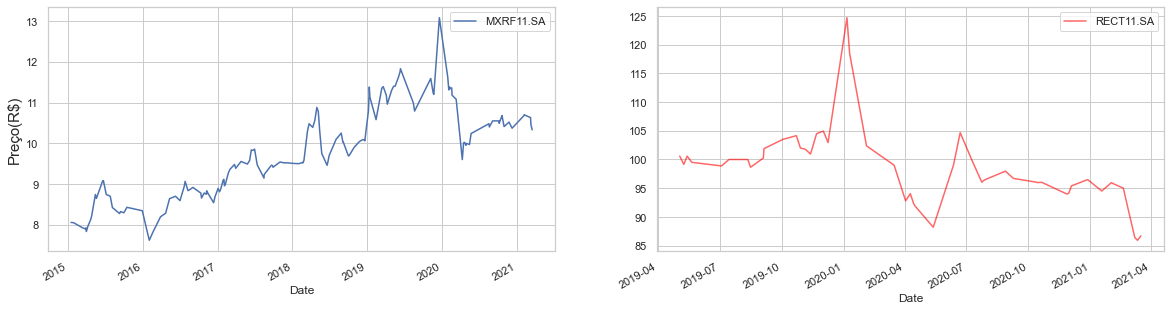

In [8]:
fig= plt.figure(figsize= (20, 5))

ax= fig.add_subplot(1, 2, 1)

ax.set_ylabel('Preço(R$)', fontdict = {'fontsize':15})

resumo_mxrf.plot(ax= ax)

ax= fig.add_subplot(1, 2, 2)

resumo_rect.plot(ax= ax, color= 'red', alpha= 0.6)


# Retorno dos ativos

Começo a análise calculando o retorno dos ativos, que é exatamente o retorno diarios que os ativos dão, para anualizar esse valor basta tirar a media(.mean()) e multiplicar por 246(que é a quantidade de pregões medio em um ano). O retorno dos ativos foi obtido usando retorno logaritmico, mas a função .pct_change() que todo objeto DataFrame do pandas tem tambem poderia ser usada.

In [9]:
retorno = np.log(dados[['ITUB3.SA', 'TAEE3.SA', 'MXRF11.SA', 'RECT11.SA']] / dados[['ITUB3.SA', 'TAEE3.SA', 'MXRF11.SA', 'RECT11.SA']].shift(1))

In [10]:
ret_anual = retorno.mean() * 246

In [11]:
ret_anual

ITUB3.SA     0.111590
TAEE3.SA     0.103370
MXRF11.SA    0.042804
RECT11.SA   -0.079325
dtype: float64

# Risco dos ativos

O risco dos ativos é a quantificação da chance de que um ativo tem de apresentar risco, nessa análise eu utilizo o calculo de desvio padrão(.std()), e anualizo esse valor multiplicando por 246 elevado a 0.5(é preciso tirar a raiz da quantidade de pregões medio já que o calculo de desvio padrão também contém uma raiz).

In [12]:
desvio = retorno.std()

In [13]:
desv_anual = retorno.std() * (246 ** 0.5)

In [14]:
desv_anual

ITUB3.SA     0.298739
TAEE3.SA     0.312453
MXRF11.SA    0.153143
RECT11.SA    0.202109
dtype: float64

In [15]:
retorno

,ITUB3.SA,TAEE3.SA,MXRF11.SA,RECT11.SA
0,NaN,NaN,NaN,NaN
1,-0.011355,0.000000,-0.013237,NaN
2,0.009740,0.000000,-0.003814,NaN
3,0.022365,0.000000,0.000127,NaN
4,0.014118,0.000000,0.000255,NaN
...,...,...,...,...
1536,0.027188,0.018238,0.000000,-0.019418
1537,0.003596,-0.004312,-0.003880,-0.007642
1538,0.000797,0.013734,0.003880,-0.000930
1539,0.004771,0.009334,-0.001938,-0.001980


Plotando em um grafico

<AxesSubplot:>

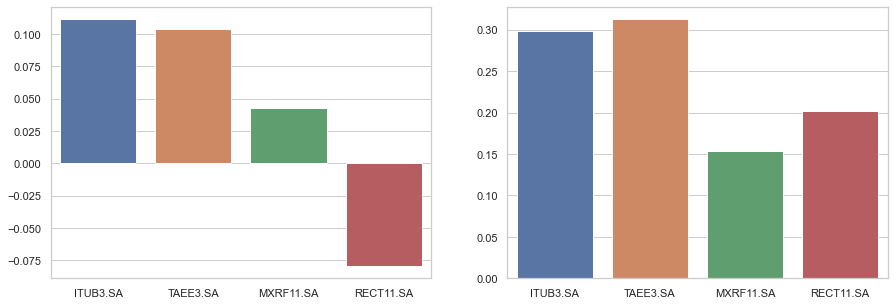

In [16]:
plt.subplots(1, 2, figsize= (15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x= ret_anual.index, y= ret_anual.values)

plt.subplot(1, 2, 2)
sns.barplot(x= desv_anual.index, y= desv_anual.values)

# Correlação e covariancia dos ativos

Correlação e covariancia são medidas para quantificar o comportamento de um ativo em relação a outro, podendo ter uma relação positiva(se um ativo sobre, o outro ativo também sobe), negativa(se um ativo sobre, o outro ativo desce) ou neutra(sem nenhuma relação entre o dois ativos). Todo objeto DataFrame do pandas tem um metodo .corr() e .cov() responsavel por calcular a correlação e a covariancia respectivamente.

In [17]:
correlacao = retorno.corr()

In [18]:
covarian = retorno.cov()

In [19]:
covarian

,ITUB3.SA,TAEE3.SA,MXRF11.SA,RECT11.SA
ITUB3.SA,0.000363,0.000037,0.000041,0.000081
TAEE3.SA,0.000037,0.000397,0.000014,0.000049
MXRF11.SA,0.000041,0.000014,0.000095,0.000068
RECT11.SA,0.000081,0.000049,0.000068,0.000166


In [20]:
correlacao

,ITUB3.SA,TAEE3.SA,MXRF11.SA,RECT11.SA
ITUB3.SA,1.000000,0.097641,0.218853,0.282667
TAEE3.SA,0.097641,1.000000,0.069916,0.242699
MXRF11.SA,0.218853,0.069916,1.000000,0.420045
RECT11.SA,0.282667,0.242699,0.420045,1.000000


O grafico heatmap é um grafico para a visualização de uma tabela de correlação, onde o espaço com a cor mais clara representa uma maior correlação entre os ativos e com a cor mais escura uma correlação negativa.

<AxesSubplot:>

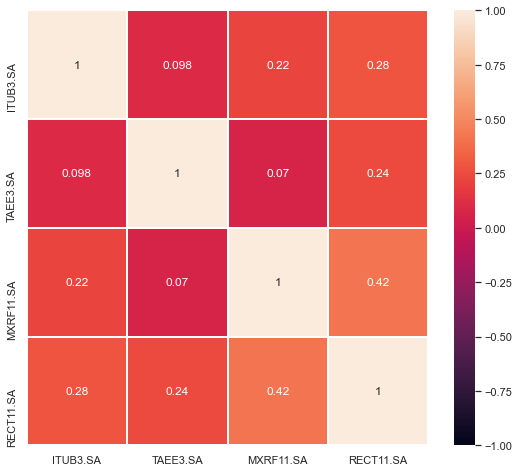

In [21]:
plt.figure(figsize= (9, 8))

sns.heatmap(correlacao, vmax= 1, vmin= -1, annot= True, linewidths= 1)

In [22]:
ret_anual

ITUB3.SA     0.111590
TAEE3.SA     0.103370
MXRF11.SA    0.042804
RECT11.SA   -0.079325
dtype: float64

In [23]:
desv_anual

ITUB3.SA     0.298739
TAEE3.SA     0.312453
MXRF11.SA    0.153143
RECT11.SA    0.202109
dtype: float64

# Sharpe Ratio

Sharpe Ratio é uma variavel criada para auxiliar na comparação de dois ativos, um ativo com uma taxa de retorno alta e taxa de risco baixa resulta em um Sharpe ratio alto.

In [24]:
sharpe_ratio = ((ret_anual - 0.027) / desv_anual)

In [25]:
sharpe_ratio.sort_values(ascending= False, inplace= True)

In [26]:
sharpe_ratio

ITUB3.SA     0.283156
TAEE3.SA     0.244422
MXRF11.SA    0.103198
RECT11.SA   -0.526076
dtype: float64

<AxesSubplot:>

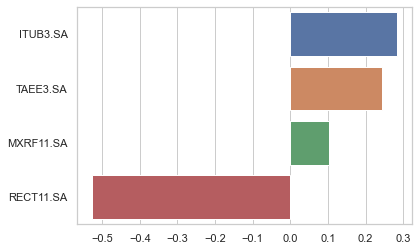

In [27]:
sns.barplot(x= sharpe_ratio.values, y= sharpe_ratio.index)

# Beta dos ativos

Variavel para quantificar o risco do ativo com relação ao mercado(IBOVESPA), quanto maior o Beta maior é a variancia do ativo em relação ao mercado, ou seja o ativo tem maior exposição ao mercado.

In [28]:
mercado_bova = web.DataReader('BOVA11.SA', 'yahoo', start= '2015')['Adj Close']

In [29]:
mercado_bova= pd.DataFrame(mercado_bova)

In [30]:
mercado_bova.rename(columns={'Adj Close': 'BOVA'}, inplace= True)

In [31]:
mercado_bova.reset_index(inplace= True)

In [32]:
dados_mercado = pd.merge(dados, mercado_bova)

In [33]:
dados_mercado

,Date,ITUB3.SA,TAEE3.SA,MXRF11.SA,RECT11.SA,BOVA
0,2015-01-02,12.322999,6.219817,7.886515,NaN,47.259998
1,2015-01-05,12.183867,6.219817,7.782810,NaN,46.320000
2,2015-01-06,12.303122,6.219817,7.753180,NaN,46.580002
3,2015-01-07,12.581381,6.219817,7.754168,NaN,48.150002
4,2015-01-08,12.760263,6.219817,7.756143,NaN,48.509998
...,...,...,...,...,...,...
1534,2021-03-15,24.629999,11.210000,10.360000,86.900002,110.519699
1535,2021-03-16,24.309999,11.410000,10.330000,88.400002,109.714340
1536,2021-03-17,24.980000,11.620000,10.330000,86.699997,112.149292
1537,2021-03-18,25.070000,11.570000,10.290000,86.040001,110.498611


In [34]:
dados_mercado_retorno= np.log(dados_mercado[['ITUB3.SA', 'TAEE3.SA', 'MXRF11.SA', 'RECT11.SA', 'BOVA']] / dados_mercado[['ITUB3.SA', 'TAEE3.SA', 'MXRF11.SA', 'RECT11.SA', 'BOVA']].shift(1))

In [35]:
cov_com_mercado= dados_mercado_retorno.cov() * 246

In [36]:
mercado_var= dados_mercado_retorno['BOVA'].var() * 246

In [37]:
cov_com_mercado

,ITUB3.SA,TAEE3.SA,MXRF11.SA,RECT11.SA,BOVA
ITUB3.SA,0.089331,0.009077,0.010023,0.020081,0.062860
TAEE3.SA,0.009077,0.097820,0.003352,0.012122,0.015889
MXRF11.SA,0.010023,0.003352,0.023481,0.016866,0.012075
RECT11.SA,0.020081,0.012122,0.016866,0.041020,0.021968
BOVA,0.062860,0.015889,0.012075,0.021968,0.074679


In [38]:
beta_ativos= cov_com_mercado.iloc[4][:4] / mercado_var

In [39]:
beta_ativos

ITUB3.SA     0.841740
TAEE3.SA     0.212769
MXRF11.SA    0.161689
RECT11.SA    0.294165
Name: BOVA, dtype: float64

<AxesSubplot:>

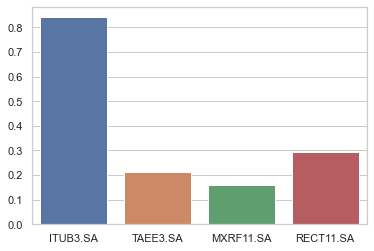

In [40]:
sns.barplot(x= beta_ativos.index, y= beta_ativos.values)

# Retorno da carteira

O retorno da carteira é o retorno da carteira de ativos, ele depende muito do peso de cada ativo na carteira. Podendo variar dependendo do retorno de cada ativo naquele momento e da quantidade de cada ativo.

In [41]:
dados.set_index('Date', inplace= True)

In [42]:
preco_ativos= dados.iloc[-1]

In [43]:
preco_ativos

ITUB3.SA     24.780001
TAEE3.SA     11.880000
MXRF11.SA    10.310000
RECT11.SA    85.959999
Name: 2021-03-23 00:00:00, dtype: float64

In [44]:
total_ativos= preco_ativos[0] * 2 + preco_ativos[1] * 4 + preco_ativos[2] * 11 + preco_ativos[3] * 1

In [45]:
pesos = np.array([preco_ativos[0] * 2 / total_ativos, preco_ativos[1] * 4 / total_ativos, preco_ativos[2] * 11 / total_ativos, preco_ativos[3] * 1 / total_ativos])

In [46]:
pesos

array([0.16717828, 0.16029684, 0.38256031, 0.28996457])

In [47]:
ret_anual

ITUB3.SA     0.111590
TAEE3.SA     0.103370
MXRF11.SA    0.042804
RECT11.SA   -0.079325
dtype: float64

In [48]:
retorno_carteira= np.dot(ret_anual, pesos)

In [49]:
print(f'{(retorno_carteira * 100):.2f}%')

2.86%


# Risco da carteira

Semelhante ao retorno da carteira, é uma média ponderada do risco de todos os ativos.

Variância

In [50]:
carteira_var= (np.dot(pesos.T, np.dot(retorno.cov() * 246, pesos)))

In [51]:
print(f'{(carteira_var * 100):.2f}%')

2.08%


Volatividade

In [52]:
carteira_vol= (np.dot(pesos.T, np.dot(retorno.cov() * 246, pesos))) ** 0.5

In [53]:
print(f'{(carteira_vol * 100):.2f}%')

14.43%


# Risco sistemático e não sistemático da carteira

O risco sistematico é a representação do risco que não é posivel ser controlado(desastres naturais, guerras e pandemias), já o risco não sistemático é a representação do risco inerente ao mercado na carteira(preço do petróleo, preço do dolar, economia interna), ele pode ser reduzido com uma boa diversificação de ativos.

In [54]:
r_diversificavel= carteira_var - ((pesos[0] ** 2 * ret_anual[0]) - (pesos[1] ** 2 * ret_anual[1]) - (pesos[2] ** 2 * ret_anual[2]) - (pesos[3] ** 2 * ret_anual[3]))

In [55]:
r_diversificavel * 100

1.9965140154451715

In [56]:
r_n_diversificavel = carteira_var - r_diversificavel

In [57]:
r_n_diversificavel * 100

0.08677684032976571